In [3]:
import pandas as pd

In [4]:
agg_df = pd.read_csv("county_daily_aggregated_timeseries.csv",index_col=0)

In [5]:
print(agg_df.shape)
agg_df.head(14)

(645, 10)


,actuals.cases,actuals.deaths,metrics.deathDensity,metrics.caseDensity,metrics.testPositivityRatio,cdcTransmissionLevel,riskLevels.caseDensity,riskLevels.overall,metrics.vaccinationsCompletedRatio,metrics.vaccinationsInitiatedRatio
date,,,,,,,,,,
2020-04-05,331769.0,9285.0,0.031711,9417.1,0.106803,0.448738,0.096146,0.195474,0.018569,0.058003
2020-04-06,362217.0,10662.0,0.038168,10161.4,0.105619,0.451557,0.100693,0.200321,0.018569,0.058003
2020-04-07,393641.0,12748.0,0.045717,10931.2,0.106687,0.453574,0.106921,0.206631,0.018569,0.058003
2020-04-08,425086.0,14655.0,0.050901,11404.1,0.106887,0.461696,0.109792,0.208432,0.018569,0.058003
2020-04-09,459307.0,16262.0,0.056929,11825.5,0.106429,0.463041,0.111778,0.209332,0.018569,0.058003
2020-04-10,492377.0,18592.0,0.062314,12092.8,0.105356,0.463066,0.114432,0.209797,0.018569,0.058003
2020-04-11,523167.0,20340.0,0.066985,12083.9,0.105561,0.466015,0.115606,0.210366,0.018569,0.058003
2020-04-12,549809.0,21916.0,0.070352,12146.7,0.106111,0.465705,0.115642,0.209394,0.018569,0.058003
2020-04-13,575201.0,23202.0,0.075433,12050.2,0.106568,0.465549,0.113268,0.205809,0.018569,0.058003


In [36]:
agg_df = (agg_df - agg_df.mean())/agg_df.std()
agg_df.head()

,actuals.cases,actuals.deaths,metrics.deathDensity,metrics.caseDensity,metrics.testPositivityRatio,cdcTransmissionLevel,riskLevels.caseDensity,riskLevels.overall,metrics.vaccinationsCompletedRatio,metrics.vaccinationsInitiatedRatio
date,,,,,,,,,,
2020-04-05,-1.415663,-1.731067,-1.446085,-1.119274,0.177391,-1.280439,-1.604119,-1.291902,-0.902101,-0.934697
2020-04-06,-1.413819,-1.725364,-1.443964,-1.108633,0.149367,-1.267468,-1.579321,-1.263114,-0.902101,-0.934697
2020-04-07,-1.411916,-1.716725,-1.441485,-1.097628,0.174666,-1.258186,-1.545354,-1.225631,-0.902101,-0.934697
2020-04-08,-1.410012,-1.708828,-1.439783,-1.090867,0.179394,-1.220820,-1.529697,-1.214940,-0.902101,-0.934697
2020-04-09,-1.407940,-1.702173,-1.437803,-1.084843,0.168560,-1.214632,-1.518864,-1.209594,-0.902101,-0.934697


In [ ]:
import pandas as pd
path = "Delta_Omicron_Pred/14DayWin_7DayPred/"
x_test = pd.read_csv(path+"x_test.csv",index_col=0)
y_test = pd.read_csv(path+"y_test.csv",index_col=0)
#These files are reference for later

In [37]:
def create_X_Y(ts, lag=1, n_ahead=1, target_index=0) -> tuple:
    """
    A method to create X and Y matrix from a time series array for the training of 
    deep learning models 
    """
    # Extracting the number of features that are passed from the array 
    n_features = ts.shape[1]
    
    # Creating placeholder lists
    X, Y = [], []

    if len(ts) - lag <= 0:
        X.append(ts)
    else:
        for i in range(len(ts) - lag - n_ahead):
            Y.append(ts[(i + lag):(i + lag + n_ahead), target_index])
            X.append(ts[i:(i + lag)])

    X, Y = np.array(X), np.array(Y)

    # Reshaping the X array to an RNN input shape 
    X = np.reshape(X, (X.shape[0], lag, n_features))

    return X, Y

In [58]:
import numpy as np
ts = agg_df.values
# ts.shape
X, Y = create_X_Y(ts, lag=14, n_ahead=7, target_index=[3])  #DEaths,Cases

In [59]:
test_slice = 159
train_val_X = X[:-test_slice]
train_val_Y = Y[:-test_slice]

X_test = X[-test_slice:]
Y_test = Y[-test_slice:]

size=int(len(train_val_X)*0.80)
X_train, X_val = train_val_X[0:size], train_val_X[size:]
Y_train, Y_val = train_val_Y[0:size], train_val_Y[size:]

In [60]:
Y_val.shape

(93, 7, 1)

In [61]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt

import tensorflow as tf
from numpy.random import seed
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Concatenate, LSTM, Dropout, Lambda, Bidirectional
from keras.models import Model
from keras import backend as K #For explicitly adjusting the learning rate
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras import Sequential

# from tensorflow import keras
import tensorflow.keras.backend as K


In [62]:
import tensorflow as tf
tf.keras.backend.clear_session()

In [63]:
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [64]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_root_mean_squared_error', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=1e-10)

# optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001)
optimizer = 'adam'

loss_fn = root_mean_squared_error
# loss_fn = 'mse'

model = Sequential()
# model.add(LSTM(128,  activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Bidirectional(LSTM(128, activation='relu', dropout=0.2), input_shape=(X_train.shape[1],X_train.shape[2])))
# model.add(LSTM(128,  activation='relu', return_sequences=True))
model.add(Dense(32, activation="relu"))
# model.add(Dropout(0.2)) 
model.add(Dense(7)) #Output Variables
model.compile(loss=loss_fn, optimizer=optimizer,metrics = [loss_fn,'mean_squared_error','mean_absolute_percentage_error','mean_absolute_error'])
model.summary()
# fit network

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 256)              142336    
 l)                                                              
                                                                 
 dense (Dense)               (None, 32)                8224      
                                                                 
 dense_1 (Dense)             (None, 7)                 231       
                                                                 
Total params: 150,791
Trainable params: 150,791
Non-trainable params: 0
_________________________________________________________________


In [65]:
history = model.fit(X_train, Y_train, validation_data = (X_val, Y_val), epochs=100, batch_size=16,  verbose=1, shuffle=False ,callbacks=[learning_rate_reduction])

Epoch 1/100
24/24 [==============================] - 5s 139ms/step - loss: 0.7071 - root_mean_squared_error: 0.6988 - mean_squared_error: 0.7722 - mean_absolute_percentage_error: 108.6271 - mean_absolute_error: 0.6717 - val_loss: 0.4325 - val_root_mean_squared_error: 0.4270 - val_mean_squared_error: 0.1965 - val_mean_absolute_percentage_error: 47.6610 - val_mean_absolute_error: 0.4087 - lr: 0.0010
Epoch 2/100
24/24 [==============================] - 3s 126ms/step - loss: 0.4352 - root_mean_squared_error: 0.4257 - mean_squared_error: 0.3549 - mean_absolute_percentage_error: 84.1388 - mean_absolute_error: 0.3957 - val_loss: 0.3366 - val_root_mean_squared_error: 0.3377 - val_mean_squared_error: 0.1470 - val_mean_absolute_percentage_error: 36.9306 - val_mean_absolute_error: 0.2950 - lr: 0.0010
Epoch 3/100
24/24 [==============================] - 3s 127ms/step - loss: 0.4434 - root_mean_squared_error: 0.4359 - mean_squared_error: 0.3585 - mean_absolute_percentage_error: 65.2905 - mean_absol

Epoch 20/100
24/24 [==============================] - 3s 131ms/step - loss: 0.1322 - root_mean_squared_error: 0.1293 - mean_squared_error: 0.0267 - mean_absolute_percentage_error: 37.0152 - mean_absolute_error: 0.1131 - val_loss: 0.1311 - val_root_mean_squared_error: 0.1339 - val_mean_squared_error: 0.0192 - val_mean_absolute_percentage_error: 17.9671 - val_mean_absolute_error: 0.1187 - lr: 2.5000e-04
Epoch 21/100
24/24 [==============================] - 3s 124ms/step - loss: 0.1241 - root_mean_squared_error: 0.1217 - mean_squared_error: 0.0257 - mean_absolute_percentage_error: 28.7383 - mean_absolute_error: 0.1054 - val_loss: 0.1414 - val_root_mean_squared_error: 0.1436 - val_mean_squared_error: 0.0217 - val_mean_absolute_percentage_error: 19.0166 - val_mean_absolute_error: 0.1307 - lr: 2.5000e-04
Epoch 22/100
24/24 [==============================] - ETA: 0s - loss: 0.1223 - root_mean_squared_error: 0.1193 - mean_squared_error: 0.0247 - mean_absolute_percentage_error: 24.3765 - mean_a

Epoch 37/100
24/24 [==============================] - ETA: 0s - loss: 0.1071 - root_mean_squared_error: 0.1055 - mean_squared_error: 0.0182 - mean_absolute_percentage_error: 23.0997 - mean_absolute_error: 0.0892
Epoch 37: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.
24/24 [==============================] - 3s 128ms/step - loss: 0.1071 - root_mean_squared_error: 0.1055 - mean_squared_error: 0.0182 - mean_absolute_percentage_error: 23.0997 - mean_absolute_error: 0.0892 - val_loss: 0.1448 - val_root_mean_squared_error: 0.1473 - val_mean_squared_error: 0.0230 - val_mean_absolute_percentage_error: 19.5702 - val_mean_absolute_error: 0.1337 - lr: 7.8125e-06
Epoch 38/100
24/24 [==============================] - 3s 126ms/step - loss: 0.1009 - root_mean_squared_error: 0.0997 - mean_squared_error: 0.0164 - mean_absolute_percentage_error: 20.3042 - mean_absolute_error: 0.0844 - val_loss: 0.1449 - val_root_mean_squared_error: 0.1474 - val_mean_squared_error: 0.0230 - val_mean_

24/24 [==============================] - 3s 128ms/step - loss: 0.1045 - root_mean_squared_error: 0.1029 - mean_squared_error: 0.0180 - mean_absolute_percentage_error: 22.2451 - mean_absolute_error: 0.0867 - val_loss: 0.1447 - val_root_mean_squared_error: 0.1472 - val_mean_squared_error: 0.0229 - val_mean_absolute_percentage_error: 19.5690 - val_mean_absolute_error: 0.1336 - lr: 1.2207e-07
Epoch 54/100
24/24 [==============================] - 3s 126ms/step - loss: 0.1004 - root_mean_squared_error: 0.0993 - mean_squared_error: 0.0157 - mean_absolute_percentage_error: 20.6137 - mean_absolute_error: 0.0833 - val_loss: 0.1447 - val_root_mean_squared_error: 0.1472 - val_mean_squared_error: 0.0229 - val_mean_absolute_percentage_error: 19.5692 - val_mean_absolute_error: 0.1336 - lr: 1.2207e-07
Epoch 55/100
24/24 [==============================] - ETA: 0s - loss: 0.1095 - root_mean_squared_error: 0.1075 - mean_squared_error: 0.0197 - mean_absolute_percentage_error: 21.1054 - mean_absolute_error

Epoch 70/100
24/24 [==============================] - ETA: 0s - loss: 0.1048 - root_mean_squared_error: 0.1032 - mean_squared_error: 0.0175 - mean_absolute_percentage_error: 22.9840 - mean_absolute_error: 0.0869
Epoch 70: ReduceLROnPlateau reducing learning rate to 1.907348723406699e-09.
24/24 [==============================] - 3s 126ms/step - loss: 0.1048 - root_mean_squared_error: 0.1032 - mean_squared_error: 0.0175 - mean_absolute_percentage_error: 22.9840 - mean_absolute_error: 0.0869 - val_loss: 0.1447 - val_root_mean_squared_error: 0.1472 - val_mean_squared_error: 0.0229 - val_mean_absolute_percentage_error: 19.5695 - val_mean_absolute_error: 0.1336 - lr: 3.8147e-09
Epoch 71/100
24/24 [==============================] - 3s 125ms/step - loss: 0.0994 - root_mean_squared_error: 0.0974 - mean_squared_error: 0.0146 - mean_absolute_percentage_error: 22.8963 - mean_absolute_error: 0.0827 - val_loss: 0.1447 - val_root_mean_squared_error: 0.1472 - val_mean_squared_error: 0.0229 - val_mean_

24/24 [==============================] - 3s 133ms/step - loss: 0.1048 - root_mean_squared_error: 0.1033 - mean_squared_error: 0.0166 - mean_absolute_percentage_error: 24.0053 - mean_absolute_error: 0.0872 - val_loss: 0.1447 - val_root_mean_squared_error: 0.1472 - val_mean_squared_error: 0.0229 - val_mean_absolute_percentage_error: 19.5695 - val_mean_absolute_error: 0.1336 - lr: 1.0000e-10
Epoch 87/100
24/24 [==============================] - 3s 124ms/step - loss: 0.0994 - root_mean_squared_error: 0.0975 - mean_squared_error: 0.0157 - mean_absolute_percentage_error: 21.2941 - mean_absolute_error: 0.0841 - val_loss: 0.1447 - val_root_mean_squared_error: 0.1472 - val_mean_squared_error: 0.0229 - val_mean_absolute_percentage_error: 19.5695 - val_mean_absolute_error: 0.1336 - lr: 1.0000e-10
Epoch 88/100
24/24 [==============================] - 3s 123ms/step - loss: 0.1020 - root_mean_squared_error: 0.0992 - mean_squared_error: 0.0163 - mean_absolute_percentage_error: 21.1983 - mean_absolute

dict_keys(['loss', 'root_mean_squared_error', 'mean_squared_error', 'mean_absolute_percentage_error', 'mean_absolute_error', 'val_loss', 'val_root_mean_squared_error', 'val_mean_squared_error', 'val_mean_absolute_percentage_error', 'val_mean_absolute_error', 'lr'])


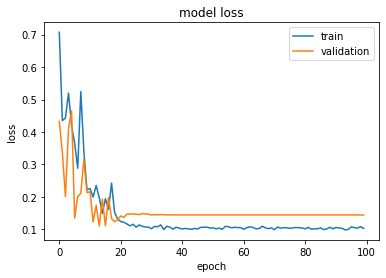

In [66]:
#Visualizing the Loss over epochs
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [67]:
model.evaluate(X_val,Y_val) #Results from MSE

3/3 [==============================] - 0s 16ms/step - loss: 0.1509 - root_mean_squared_error: 0.1513 - mean_squared_error: 0.0229 - mean_absolute_percentage_error: 19.5695 - mean_absolute_error: 0.1336


[0.15091679990291595,
 0.15132851898670197,
 0.022932114079594612,
 19.569547653198242,
 0.13360360264778137]

In [69]:
model.evaluate(X_test,Y_test)

5/5 [==============================] - 0s 12ms/step - loss: 1.1723 - root_mean_squared_error: 1.1772 - mean_squared_error: 1.5480 - mean_absolute_percentage_error: 257.3361 - mean_absolute_error: 1.0912


[1.1723439693450928,
 1.1771799325942993,
 1.5480270385742188,
 257.3360595703125,
 1.0911943912506104]

In [117]:
#Using the Test Dataframe indices from the original dataframe (Same slice positioi)
y_test_df=pd.DataFrame(Y_test.squeeze())
y_test_df.index = y_test.index
y_test_df.columns = y_test.iloc[:,[1,3,5,7,9,11,13]].columns
y_test_df.head()

,metrics.caseDensity(t),metrics.caseDensity(t+1),metrics.caseDensity(t+2),metrics.caseDensity(t+3),metrics.caseDensity(t+4),metrics.caseDensity(t+5),metrics.caseDensity(t+6)
date,,,,,,,
2021-07-29,-0.355167,-0.288890,-0.230513,-0.194189,-0.149601,-0.109870,-0.050889
2021-07-30,-0.288890,-0.230513,-0.194189,-0.149601,-0.109870,-0.050889,0.015793
2021-07-31,-0.230513,-0.194189,-0.149601,-0.109870,-0.050889,0.015793,0.087310
2021-08-01,-0.194189,-0.149601,-0.109870,-0.050889,0.015793,0.087310,0.155431
2021-08-02,-0.149601,-0.109870,-0.050889,0.015793,0.087310,0.155431,0.220339


In [118]:
y_pred = model.predict(X_test)
y_pred_df=pd.DataFrame(y_pred)
y_pred_df.index = y_test.index
y_pred_df.columns = y_test.iloc[:,[1,3,5,7,9,11,13]].columns
y_pred_df.head()

,metrics.caseDensity(t),metrics.caseDensity(t+1),metrics.caseDensity(t+2),metrics.caseDensity(t+3),metrics.caseDensity(t+4),metrics.caseDensity(t+5),metrics.caseDensity(t+6)
date,,,,,,,
2021-07-29,-0.512405,-0.497673,-0.597931,-0.595972,-0.596959,-0.591807,-0.545094
2021-07-30,-0.483957,-0.461527,-0.566865,-0.572457,-0.578788,-0.569426,-0.527281
2021-07-31,-0.452073,-0.434011,-0.529538,-0.548269,-0.550288,-0.536263,-0.511078
2021-08-01,-0.422777,-0.411124,-0.489502,-0.523493,-0.517752,-0.500966,-0.493434
2021-08-02,-0.396009,-0.388691,-0.453218,-0.500189,-0.489638,-0.470309,-0.478475


## Rescaling the value and Plotting


In [119]:
import json
file_path = "daily_data_scaling_inforamtion.json"
with open (file_path) as file:
    data = json.load(file)
cases_mean = data['cases_mean']
cases_std = data['cases_std']
cases_mean, cases_std

(87708.1127131783, 69948.04441944878)

In [120]:
def rescaling_cases(df,cases_mean,cases_std):
    rescaled_df = pd.DataFrame()
    for feature in df.columns:
        rescaled_df[[feature]] = (df[[feature]]*cases_std) + cases_mean
    return rescaled_df
        
rescaled_y_test = rescaling_cases(y_test_df,cases_mean,cases_std)
rescaled_y_pred_df = rescaling_cases(y_pred_df,cases_mean,cases_std)

In [121]:
rescaled_y_pred_df.shape

(159, 7)

In [122]:
rescaled_y_test.shape

(159, 7)

In [123]:
def create_weekly_prediction(df): 
    indices = df.index.tolist()

    results = []
    for index in range(len(indices)):
        if index ==0 or (index+1)%7==0:
            results+=df.loc[indices[index]].tolist()
             
    results = results[0:len(indices)] #Removing the last few indices that are not available for the original data
    new_df = pd.DataFrame()
    new_df.index = df.index        
    new_df['metrics.caseDensity(t)']=results
    
    return new_df

weekly_rescaled_y_test = create_weekly_prediction(rescaled_y_test)
weekly_rescaled_y_pred_df = create_weekly_prediction(rescaled_y_pred_df)

In [124]:
weekly_rescaled_y_test, weekly_rescaled_y_pred_df

(            metrics.caseDensity(t)
 date                              
 2021-07-29                 62864.9
 2021-07-30                 67500.8
 2021-07-31                 71584.2
 2021-08-01                 74125.0
 2021-08-02                 77243.8
 ...                            ...
 2021-12-30                153030.9
 2021-12-31                171137.3
 2022-01-01                199440.9
 2022-01-02                225943.3
 2022-01-03                250292.3
 
 [159 rows x 1 columns],
             metrics.caseDensity(t)
 date                              
 2021-07-29            51866.394531
 2021-07-30            52896.878906
 2021-07-31            45884.027344
 2021-08-01            46021.019531
 2021-08-02            45952.015625
 ...                            ...
 2021-12-30            66155.304688
 2021-12-31            65673.875000
 2022-01-01            48614.921875
 2022-01-02            47638.937500
 2022-01-03            38987.777344
 
 [159 rows x 1 columns])

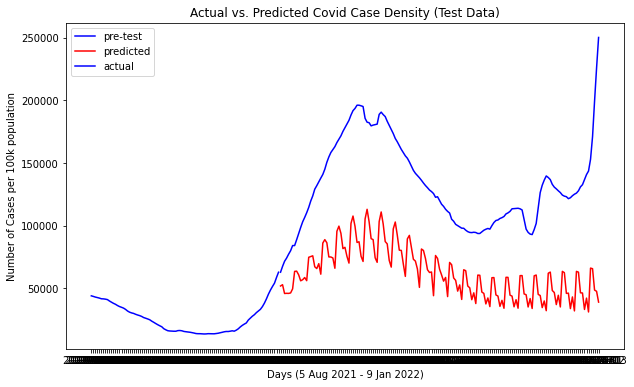

In [125]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(rescaling_cases(y_val,cases_mean,cases_std)['metrics.caseDensity(t)'], color='blue')
plt.plot(weekly_rescaled_y_pred_df['metrics.caseDensity(t)'], color='red')
plt.plot(weekly_rescaled_y_test['metrics.caseDensity(t)'], color='blue')
plt.title('Actual vs. Predicted Covid Case Density (Test Data)')
plt.ylabel('Number of Cases per 100k population')
plt.xlabel('Days (5 Aug 2021 - 9 Jan 2022)')
plt.legend(['pre-test','predicted', 'actual'])

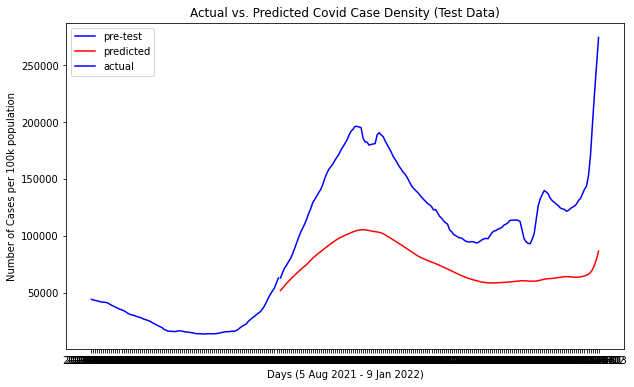

In [126]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(rescaling_cases(y_val,cases_mean,cases_std)['metrics.caseDensity(t)'], color='blue')
plt.plot(rescaled_y_pred_df['metrics.caseDensity(t)'], color='red')
plt.plot(rescaled_y_test['metrics.caseDensity(t)'], color='blue')
plt.title('Actual vs. Predicted Covid Case Density (Test Data)')
plt.ylabel('Number of Cases per 100k population')
plt.xlabel('Days (5 Aug 2021 - 9 Jan 2022)')
plt.legend(['pre-test','predicted', 'actual'])

In [157]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(10,6))
# plt.plot(y_pred_df['metrics.deathDensity(t)'], color='red')
# plt.plot(y_test['metrics.deathDensity(t)'], color='blue')
# plt.title('Actual vs. Predicted Covid Death Density (Test Data)')
# plt.ylabel('Deaths/Population (Scaled)')
# plt.xlabel('Days (5 Aug 2021 - 9 Jan 2022)')
# plt.legend(['predicted', 'actual'])